In [1]:
import tensorflow as tf
import os
import numpy as np
from os import listdir
from PIL import Image
from sklearn.model_selection import train_test_split
import imageio
import cv2
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.optimizers import SGD
from sklearn.model_selection import KFold
import sklearn.metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:

imgSize = 64 #resize all images 64*64 pixels
numClasses = 10 #0->9
testSize = 0.2 #20% testing, 80%training


In [4]:
#get dataset 
dataset_path='/content/drive/MyDrive/Dataset'
l=listdir(dataset_path)
X = []
Y = []
for i, label in enumerate(l):
    # print(i,'  ',label)
    datas_path = dataset_path + '/' + label
    for data in listdir(datas_path):
        # print('** ',data)
        img = imageio.imread(datas_path + '/' + data, as_gray=True)
        img = cv2.resize(img, (imgSize,imgSize))
        X.append(img)
        Y.append(label)

4
1649


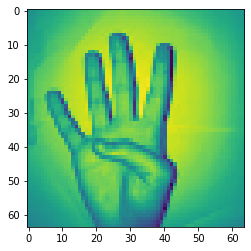

In [5]:
# Splitting data 
# 80% Train, 20% Test Data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
    
x_train = np.asarray(x_train)
x_test = np.asarray(x_test)
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

#test image in train
plt.imshow(x_train[10])

#get its categorized value
print(y_train[10])
print(x_train.shape[0])

In [6]:
# print('x shape : ',x_train.shape)
# print('x shape2 : ',x_test.shape)
# x_train.shape[0]
x_train = x_train.reshape((x_train.shape[0], imgSize, imgSize,1))
x_test = x_test.reshape((x_test.shape[0], imgSize, imgSize,1))
    
 #0,1,2,..9   
y_train = to_categorical(y_train, numClasses)
y_test = to_categorical(y_test, numClasses)

# Making sure that the values are float 
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalizing .
x_train /= 255
x_test /= 255

In [7]:
#Build 1st model architecture
model = Sequential()

#input layer
model.add(Flatten())

#hidden layer with 128 neurons, activation fun: relu
model.add(Dense(128, activation='relu'))

#hidden layer with 64 neurons, activation fun: relu
model.add(Dense(64, activation='relu'))

#output layer, activation function softmax
model.add(Dense(numClasses, activation='softmax'))

# Compile
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
# k-fold cross-validation during trianing
scores, histories = list(), list()
sum_ = 0.0
# prepare cross validation
K=4
kfold = KFold(K, shuffle=True, random_state=1)

# enumerate splits
for train_ix, val_ix in kfold.split(x_train):
    # select rows for train and test
    trainX, trainY, valX, valY = x_train[train_ix], y_train[train_ix], x_train[val_ix], y_train[val_ix]
    # fit model
    history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(valX, valY), verbose=0)
    # evaluate model
    _, acc = model.evaluate(valX, valY, verbose=0)
    # stores scores
    scores.append(acc)
    histories.append(history)
    sum_ += acc
scoreOfVal = sum_ / K

#Testing Accuracy
_, scoreOfTest = model.evaluate(x_test, y_test, batch_size=32, verbose=0)

In [9]:
print('accuracy for Validation = ', scoreOfVal)
print('accuracy for Testing = ', scoreOfTest)

y_pred = model.predict(x_test)
# print(y_pred)


y_pred_ =np.argmax(y_pred, axis=1)
y_test_ =np.argmax(y_test, axis=1)
# print(y_test)


print(classification_report(y_test_, y_pred_))
print (confusion_matrix(y_test_, y_pred_))

# # Precision= TP/(TP + FP) = Accuracy of positive predictions.

# # Recall = TP/(TP+FN) = Fraction of positives that were correctly identified.

# # F1 Score = 2*(Recall * Precision) / (Recall + Precision) = What percent of positive predictions were correct? 



accuracy for Validation =  0.6319979876279831
accuracy for Testing =  0.7360774874687195
13/13 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.73      0.87      0.80        38
           1       0.91      0.81      0.86        48
           2       0.75      0.89      0.81        46
           3       0.59      0.91      0.72        35
           4       0.63      0.55      0.59        40
           5       0.81      0.78      0.80        50
           6       0.60      0.84      0.70        32
           7       0.74      0.67      0.70        39
           8       0.84      0.60      0.70        45
           9       0.86      0.45      0.59        40

    accuracy                           0.74       413
   macro avg       0.75      0.74      0.73       413
weighted avg       0.76      0.74      0.73       413

[[33  0  0  0  1  0  3  0  0  1]
 [ 2 39  2  2  1  0  0  1  1  0]
 [ 0  1 41  0  0  0  2  2  0  0]
